In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
path = '/content/austin_weather.csv'
df = pd.read_csv(path)
df = df.drop('Events', axis=1)
df = df.drop('Date', axis=1)
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0


In [ ]:
df = df.replace('-', pd.NA)
df = df.replace('T', pd.NA)
df = df.dropna()

In [ ]:
df = df.reset_index(drop=True)
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0
4,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0
1179,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0
1180,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0
1181,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0


In [ ]:
# Hyperparameters
input_size = 18  #input dim
output_dim = 1
learning_rate = 0.0001
num_epochs = 100
batch_size = 1

In [ ]:
labels = df['TempAvgF'].to_numpy(dtype='int64')
labels

array([60, 48, 45, ..., 92, 93, 88])

In [ ]:
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.drop('TempAvgF', axis=1)
print(data.shape)

(1183, 18)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=101)

In [ ]:
data = data.to_numpy(dtype='float32')
#data = stats.zscore(data, axis=1)
data = scaler.fit_transform(data)
print(data.shape)
#data = data.reshape(data.shape[0], data.shape[1], 1)
data

(1183, 18)


array([[0.56      , 0.4193548 , 0.80597013, ..., 0.27272728, 0.45833337,
        0.08846154],
       [0.32      , 0.32258064, 0.44776118, ..., 0.45454547, 0.33333337,
        0.        ],
       [0.3466667 , 0.2096774 , 0.26865673, ..., 0.18181819, 0.0625    ,
        0.        ],
       ...,
       [1.        , 0.9354839 , 0.88059694, ..., 0.27272728, 0.16666669,
        0.        ],
       [0.98666674, 0.9677419 , 0.8507462 , ..., 0.27272728, 0.22916669,
        0.        ],
       [0.8933334 , 0.9354839 , 0.7910447 , ..., 0.27272728, 0.22916669,
        0.        ]], dtype=float32)

In [ ]:
data.shape

(1183, 18)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, datas, labels):
        self.datas = datas  # Convert Series to NumPy array
        self.labels = labels  # Convert Series to NumPy array

    def __len__(self):
        return len(self.datas)

    def __getitem__(self, idx):
        data = self.datas[idx]
        label = self.labels[idx]
        out = torch.tensor(data, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)
        # print(out)
        return out

In [ ]:
from re import X
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = CustomDataset(data, labels)
train_set , test_set = torch.utils.data.random_split(dataset, [int(0.8*len(dataset)), len(dataset) - int(0.8*len(dataset))])
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [ ]:
dataset[0]

(tensor([0.5600, 0.4194, 0.8060, 0.6029, 0.5616, 0.8889, 0.6857, 0.5663, 0.1917,
         0.1092, 0.1500, 1.0000, 0.6250, 0.2000, 0.6087, 0.2727, 0.4583, 0.0885]),
 tensor(60.))

In [ ]:
# for batch_idx, (data, target) in enumerate(train_loader):
#     print(f"Batch {batch_idx}:")
#     print("Data:", data)
#     print("Target:", target)
#     break  # Stop after the first batch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
class NeuralNet(nn.Module):
  def __init__(self, input_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size

    self.fc1 = nn.Linear(input_size, 100)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(100, 50)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(50, 1)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu2(out)
    out = self.fc3(out)
    return out.squeeze()

In [ ]:
# Initialize the model
model = NeuralNet(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(model)

NeuralNet(
  (fc1): Linear(in_features=18, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
from tqdm import tqdm
# Train the model
def train_model():
  model.train()
  losses = []
  for epoch in range(num_epochs):
    total_loss = 0
    for i, (datas, labels) in enumerate(tqdm(train_loader)):
      datas = datas.to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = model(datas)
      # print("OUTPUTS")
      # print(outputs)
      # print("Labels")
      # print(labels)
      loss = criterion(outputs, labels)

      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    loss = total_loss/len(train_loader)
    losses.append(loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')
  return losses

In [ ]:
print("NeuralNet TRAINING")
nnLoss = train_model()

NeuralNet TRAINING


  0%|          | 0/946 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 946/946 [00:03<00:00, 276.76it/s]


Epoch [1/100], Loss: 3907.1426


100%|██████████| 946/946 [00:02<00:00, 346.24it/s]


Epoch [2/100], Loss: 274.8958


100%|██████████| 946/946 [00:02<00:00, 344.88it/s]


Epoch [3/100], Loss: 84.9287


100%|██████████| 946/946 [00:02<00:00, 344.82it/s]


Epoch [4/100], Loss: 71.8663


100%|██████████| 946/946 [00:02<00:00, 362.49it/s]


Epoch [5/100], Loss: 58.9079


100%|██████████| 946/946 [00:02<00:00, 348.44it/s]


Epoch [6/100], Loss: 46.9920


100%|██████████| 946/946 [00:02<00:00, 349.50it/s]


Epoch [7/100], Loss: 36.5669


100%|██████████| 946/946 [00:02<00:00, 320.12it/s]


Epoch [8/100], Loss: 27.8166


100%|██████████| 946/946 [00:02<00:00, 335.79it/s]


Epoch [9/100], Loss: 20.9546


100%|██████████| 946/946 [00:02<00:00, 368.97it/s]


Epoch [10/100], Loss: 15.6249


100%|██████████| 946/946 [00:02<00:00, 415.91it/s]


Epoch [11/100], Loss: 12.2655


100%|██████████| 946/946 [00:02<00:00, 421.11it/s]


Epoch [12/100], Loss: 9.9232


100%|██████████| 946/946 [00:02<00:00, 378.77it/s]


Epoch [13/100], Loss: 8.5904


100%|██████████| 946/946 [00:02<00:00, 339.46it/s]


Epoch [14/100], Loss: 7.5273


100%|██████████| 946/946 [00:02<00:00, 427.26it/s]


Epoch [15/100], Loss: 6.7520


100%|██████████| 946/946 [00:02<00:00, 343.50it/s]


Epoch [16/100], Loss: 6.0513


100%|██████████| 946/946 [00:02<00:00, 379.85it/s]


Epoch [17/100], Loss: 5.5148


100%|██████████| 946/946 [00:02<00:00, 403.29it/s]


Epoch [18/100], Loss: 4.9893


100%|██████████| 946/946 [00:02<00:00, 407.63it/s]


Epoch [19/100], Loss: 4.4860


100%|██████████| 946/946 [00:02<00:00, 330.57it/s]


Epoch [20/100], Loss: 4.0833


100%|██████████| 946/946 [00:03<00:00, 313.95it/s]


Epoch [21/100], Loss: 3.7320


100%|██████████| 946/946 [00:02<00:00, 366.53it/s]


Epoch [22/100], Loss: 3.4623


100%|██████████| 946/946 [00:02<00:00, 316.75it/s]


Epoch [23/100], Loss: 3.2046


100%|██████████| 946/946 [00:02<00:00, 320.73it/s]


Epoch [24/100], Loss: 2.9586


100%|██████████| 946/946 [00:02<00:00, 348.76it/s]


Epoch [25/100], Loss: 2.7503


100%|██████████| 946/946 [00:02<00:00, 364.48it/s]


Epoch [26/100], Loss: 2.5951


100%|██████████| 946/946 [00:02<00:00, 368.19it/s]


Epoch [27/100], Loss: 2.4156


100%|██████████| 946/946 [00:02<00:00, 353.64it/s]


Epoch [28/100], Loss: 2.2588


100%|██████████| 946/946 [00:02<00:00, 324.14it/s]


Epoch [29/100], Loss: 2.0961


100%|██████████| 946/946 [00:02<00:00, 366.56it/s]


Epoch [30/100], Loss: 1.9718


100%|██████████| 946/946 [00:02<00:00, 377.03it/s]


Epoch [31/100], Loss: 1.8741


100%|██████████| 946/946 [00:02<00:00, 375.03it/s]


Epoch [32/100], Loss: 1.7423


100%|██████████| 946/946 [00:02<00:00, 390.86it/s]


Epoch [33/100], Loss: 1.6584


100%|██████████| 946/946 [00:02<00:00, 344.74it/s]


Epoch [34/100], Loss: 1.5659


100%|██████████| 946/946 [00:02<00:00, 365.83it/s]


Epoch [35/100], Loss: 1.4535


100%|██████████| 946/946 [00:02<00:00, 350.36it/s]


Epoch [36/100], Loss: 1.3767


100%|██████████| 946/946 [00:02<00:00, 366.63it/s]


Epoch [37/100], Loss: 1.2810


100%|██████████| 946/946 [00:02<00:00, 349.68it/s]


Epoch [38/100], Loss: 1.2043


100%|██████████| 946/946 [00:02<00:00, 362.71it/s]


Epoch [39/100], Loss: 1.1596


100%|██████████| 946/946 [00:02<00:00, 352.83it/s]


Epoch [40/100], Loss: 1.0733


100%|██████████| 946/946 [00:02<00:00, 348.56it/s]


Epoch [41/100], Loss: 1.0062


100%|██████████| 946/946 [00:02<00:00, 342.23it/s]


Epoch [42/100], Loss: 0.9576


100%|██████████| 946/946 [00:02<00:00, 370.44it/s]


Epoch [43/100], Loss: 0.9217


100%|██████████| 946/946 [00:02<00:00, 372.31it/s]


Epoch [44/100], Loss: 0.8721


100%|██████████| 946/946 [00:02<00:00, 382.92it/s]


Epoch [45/100], Loss: 0.8204


100%|██████████| 946/946 [00:02<00:00, 361.90it/s]


Epoch [46/100], Loss: 0.7817


100%|██████████| 946/946 [00:02<00:00, 358.47it/s]


Epoch [47/100], Loss: 0.7510


100%|██████████| 946/946 [00:02<00:00, 400.85it/s]


Epoch [48/100], Loss: 0.7127


100%|██████████| 946/946 [00:02<00:00, 388.68it/s]


Epoch [49/100], Loss: 0.6621


100%|██████████| 946/946 [00:02<00:00, 418.26it/s]


Epoch [50/100], Loss: 0.6638


100%|██████████| 946/946 [00:02<00:00, 362.25it/s]


Epoch [51/100], Loss: 0.6402


100%|██████████| 946/946 [00:02<00:00, 400.20it/s]


Epoch [52/100], Loss: 0.6063


100%|██████████| 946/946 [00:02<00:00, 395.76it/s]


Epoch [53/100], Loss: 0.5833


100%|██████████| 946/946 [00:02<00:00, 386.05it/s]


Epoch [54/100], Loss: 0.5684


100%|██████████| 946/946 [00:02<00:00, 420.08it/s]


Epoch [55/100], Loss: 0.5575


100%|██████████| 946/946 [00:02<00:00, 423.70it/s]


Epoch [56/100], Loss: 0.5384


100%|██████████| 946/946 [00:02<00:00, 411.70it/s]


Epoch [57/100], Loss: 0.5226


100%|██████████| 946/946 [00:02<00:00, 384.41it/s]


Epoch [58/100], Loss: 0.5098


100%|██████████| 946/946 [00:02<00:00, 397.39it/s]


Epoch [59/100], Loss: 0.4774


100%|██████████| 946/946 [00:02<00:00, 400.38it/s]


Epoch [60/100], Loss: 0.4769


100%|██████████| 946/946 [00:02<00:00, 372.12it/s]


Epoch [61/100], Loss: 0.4661


100%|██████████| 946/946 [00:02<00:00, 384.23it/s]


Epoch [62/100], Loss: 0.4514


100%|██████████| 946/946 [00:02<00:00, 409.49it/s]


Epoch [63/100], Loss: 0.4440


100%|██████████| 946/946 [00:02<00:00, 418.63it/s]


Epoch [64/100], Loss: 0.4359


100%|██████████| 946/946 [00:02<00:00, 373.83it/s]


Epoch [65/100], Loss: 0.4307


100%|██████████| 946/946 [00:02<00:00, 393.92it/s]


Epoch [66/100], Loss: 0.4219


100%|██████████| 946/946 [00:02<00:00, 384.28it/s]


Epoch [67/100], Loss: 0.4082


100%|██████████| 946/946 [00:02<00:00, 411.35it/s]


Epoch [68/100], Loss: 0.4061


100%|██████████| 946/946 [00:02<00:00, 390.00it/s]


Epoch [69/100], Loss: 0.3977


100%|██████████| 946/946 [00:02<00:00, 400.44it/s]


Epoch [70/100], Loss: 0.3945


100%|██████████| 946/946 [00:02<00:00, 339.01it/s]


Epoch [71/100], Loss: 0.3812


100%|██████████| 946/946 [00:02<00:00, 363.65it/s]


Epoch [72/100], Loss: 0.3695


100%|██████████| 946/946 [00:02<00:00, 333.31it/s]


Epoch [73/100], Loss: 0.3718


100%|██████████| 946/946 [00:02<00:00, 327.30it/s]


Epoch [74/100], Loss: 0.3608


100%|██████████| 946/946 [00:02<00:00, 428.89it/s]


Epoch [75/100], Loss: 0.3497


100%|██████████| 946/946 [00:02<00:00, 420.78it/s]


Epoch [76/100], Loss: 0.3639


100%|██████████| 946/946 [00:02<00:00, 445.51it/s]


Epoch [77/100], Loss: 0.3403


100%|██████████| 946/946 [00:02<00:00, 347.24it/s]


Epoch [78/100], Loss: 0.3386


100%|██████████| 946/946 [00:02<00:00, 384.38it/s]


Epoch [79/100], Loss: 0.3336


100%|██████████| 946/946 [00:02<00:00, 390.24it/s]


Epoch [80/100], Loss: 0.3353


100%|██████████| 946/946 [00:02<00:00, 387.03it/s]


Epoch [81/100], Loss: 0.3287


100%|██████████| 946/946 [00:02<00:00, 375.22it/s]


Epoch [82/100], Loss: 0.3197


100%|██████████| 946/946 [00:02<00:00, 356.87it/s]


Epoch [83/100], Loss: 0.3126


100%|██████████| 946/946 [00:02<00:00, 376.21it/s]


Epoch [84/100], Loss: 0.3105


100%|██████████| 946/946 [00:02<00:00, 376.84it/s]


Epoch [85/100], Loss: 0.3089


100%|██████████| 946/946 [00:02<00:00, 423.68it/s]


Epoch [86/100], Loss: 0.3034


100%|██████████| 946/946 [00:02<00:00, 467.12it/s]


Epoch [87/100], Loss: 0.2988


100%|██████████| 946/946 [00:02<00:00, 378.10it/s]


Epoch [88/100], Loss: 0.2920


100%|██████████| 946/946 [00:02<00:00, 339.79it/s]


Epoch [89/100], Loss: 0.2902


100%|██████████| 946/946 [00:02<00:00, 353.51it/s]


Epoch [90/100], Loss: 0.2808


100%|██████████| 946/946 [00:02<00:00, 344.04it/s]


Epoch [91/100], Loss: 0.2786


100%|██████████| 946/946 [00:02<00:00, 384.20it/s]


Epoch [92/100], Loss: 0.2777


100%|██████████| 946/946 [00:02<00:00, 377.86it/s]


Epoch [93/100], Loss: 0.2738


100%|██████████| 946/946 [00:02<00:00, 427.31it/s]


Epoch [94/100], Loss: 0.2717


100%|██████████| 946/946 [00:02<00:00, 424.17it/s]


Epoch [95/100], Loss: 0.2700


100%|██████████| 946/946 [00:02<00:00, 353.29it/s]


Epoch [96/100], Loss: 0.2682


100%|██████████| 946/946 [00:02<00:00, 350.07it/s]


Epoch [97/100], Loss: 0.2490


100%|██████████| 946/946 [00:02<00:00, 358.06it/s]


Epoch [98/100], Loss: 0.2486


100%|██████████| 946/946 [00:02<00:00, 351.22it/s]


Epoch [99/100], Loss: 0.2538


100%|██████████| 946/946 [00:02<00:00, 356.14it/s]

Epoch [100/100], Loss: 0.2484


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
def evaluate_model():
  all_preds = []
  all_labels = []

  with torch.no_grad():
      for datas, labels in test_loader:
          datas = datas.to(device)
          labels = labels.to(device)
          predictions = model(datas)
          all_preds.append(predictions.item())
          all_labels.append(labels.item())

  mse = mean_squared_error(all_labels, all_preds)
  mae = mean_absolute_error(all_labels, all_preds)
  rmse = np.sqrt(mean_squared_error(all_preds, all_labels))
  rmsle = np.sqrt(mean_squared_log_error(all_preds, all_labels))

  print(f'Mean Squared Error: {mse:.4f}')
  print(f'Mean Absolute Error: {mae:.4f}')
  print(f'Root Mean Squared Error: {rmse:.4f}')
  print(f'Root Mean Squared Logarithmic Error: {rmsle:.4f}')

In [ ]:
evaluate_model()

Mean Squared Error: 0.8757
Mean Absolute Error: 0.4891
Root Mean Squared Error: 0.9358
Root Mean Squared Logarithmic Error: 0.0187


In [ ]:
print(nnLoss)

[3907.142573612689, 274.89576956083954, 84.92874223389103, 71.86625983264142, 58.90794910641483, 46.991982149258995, 36.56686200561127, 27.816597902533637, 20.954576869751364, 15.624922130369123, 12.265502998608463, 9.923156886757548, 8.590364368729654, 7.527312583076423, 6.752026425726397, 6.051306506103864, 5.514846103777275, 4.989278610417263, 4.485952016714216, 4.0833499066305965, 3.7319507824498093, 3.4622887071772857, 3.2045819677001366, 2.9586070027537494, 2.7503053479556807, 2.5951221689314243, 2.415586559228507, 2.2587775453628804, 2.0960799144951157, 1.9717751792960923, 1.8740637040239008, 1.7423430384641838, 1.658371419128007, 1.565870123234003, 1.4534536134500853, 1.3766852282546669, 1.2810295034253576, 1.2042676456189136, 1.1595505515720654, 1.0732539695735033, 1.0062226800023872, 0.9575870875245178, 0.9216722606225625, 0.8720669607636723, 0.8204347523344087, 0.7817321840212239, 0.7509925448178713, 0.712724996925244, 0.6620613331457327, 0.6638161818640772, 0.64016218409697

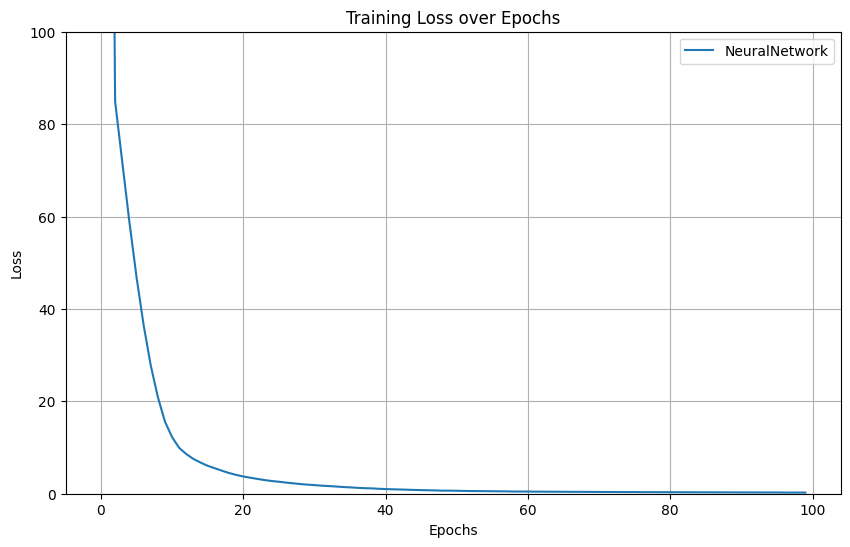

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.ylim(0, 100)

plt.plot(nnLoss,label='NeuralNetwork')

plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('foo.png')
plt.show()